# Evaluamos con algunas métricas

In [2]:
files_ndcg = [
    '/home/cbolanos/experiments/audioset_evaluation/ndcg/ndcg_linear_regression.tsv',
    '/home/cbolanos/experiments/audioset_evaluation/ndcg/ndcg_naive.tsv',
    '/home/cbolanos/experiments/audioset_evaluation/ndcg/ndcg_shap.tsv',
    '/home/cbolanos/experiments/audioset_evaluation/ndcg/ndcg_tree_importance.tsv'
]

files_curve = ['/home/cbolanos/experiments/audioset_evaluation/leo_metric/score_curve_linear_regression.tsv',
                '/home/cbolanos/experiments/audioset_evaluation/leo_metric/score_curve_naive.tsv',
                '/home/cbolanos/experiments/audioset_evaluation/leo_metric/score_curve_shap.tsv',
                '/home/cbolanos/experiments/audioset_evaluation/leo_metric/score_curve_tree_importance.tsv']

files_auc = ['/home/cbolanos/experiments/audioset_evaluation/auc/order_linear_regression.tsv',
             '/home/cbolanos/experiments/audioset_evaluation/auc/order_naive.tsv',
             '/home/cbolanos/experiments/audioset_evaluation/auc/order_shap.tsv',
             '/home/cbolanos/experiments/audioset_evaluation/auc/order_tree_importance.tsv']

AUC

In [4]:
import pandas as pd


thresholds = [-2, -1, 0, 1]
results = []
for file in files_auc:
    df = pd.read_csv(file, sep='\t')
    method = file.split('/')[-1].replace('order_', '').replace('.tsv', '')
    
    for threshold in thresholds:
        filtered_df = df[df['actual_score'] > threshold]
        
        result = {
            'method': method,
            'threshold': threshold,
            'mean_auc': filtered_df['roc_auc'].mean(),
            'count': len(filtered_df)
        }
        results.append(result)

final_df = pd.DataFrame(results)
print(final_df)

               method  threshold  mean_auc  count
0   linear_regression         -2  0.618007    607
1   linear_regression         -1  0.622092    479
2   linear_regression          0  0.625497    307
3   linear_regression          1  0.635446    158
4               naive         -2  0.632201    607
5               naive         -1  0.627364    479
6               naive          0  0.623516    307
7               naive          1  0.623306    158
8                shap         -2  0.613426    607
9                shap         -1  0.613385    479
10               shap          0  0.603058    307
11               shap          1  0.605136    158
12    tree_importance         -2  0.761274    607
13    tree_importance         -1  0.761535    479
14    tree_importance          0  0.756023    307
15    tree_importance          1  0.764343    158


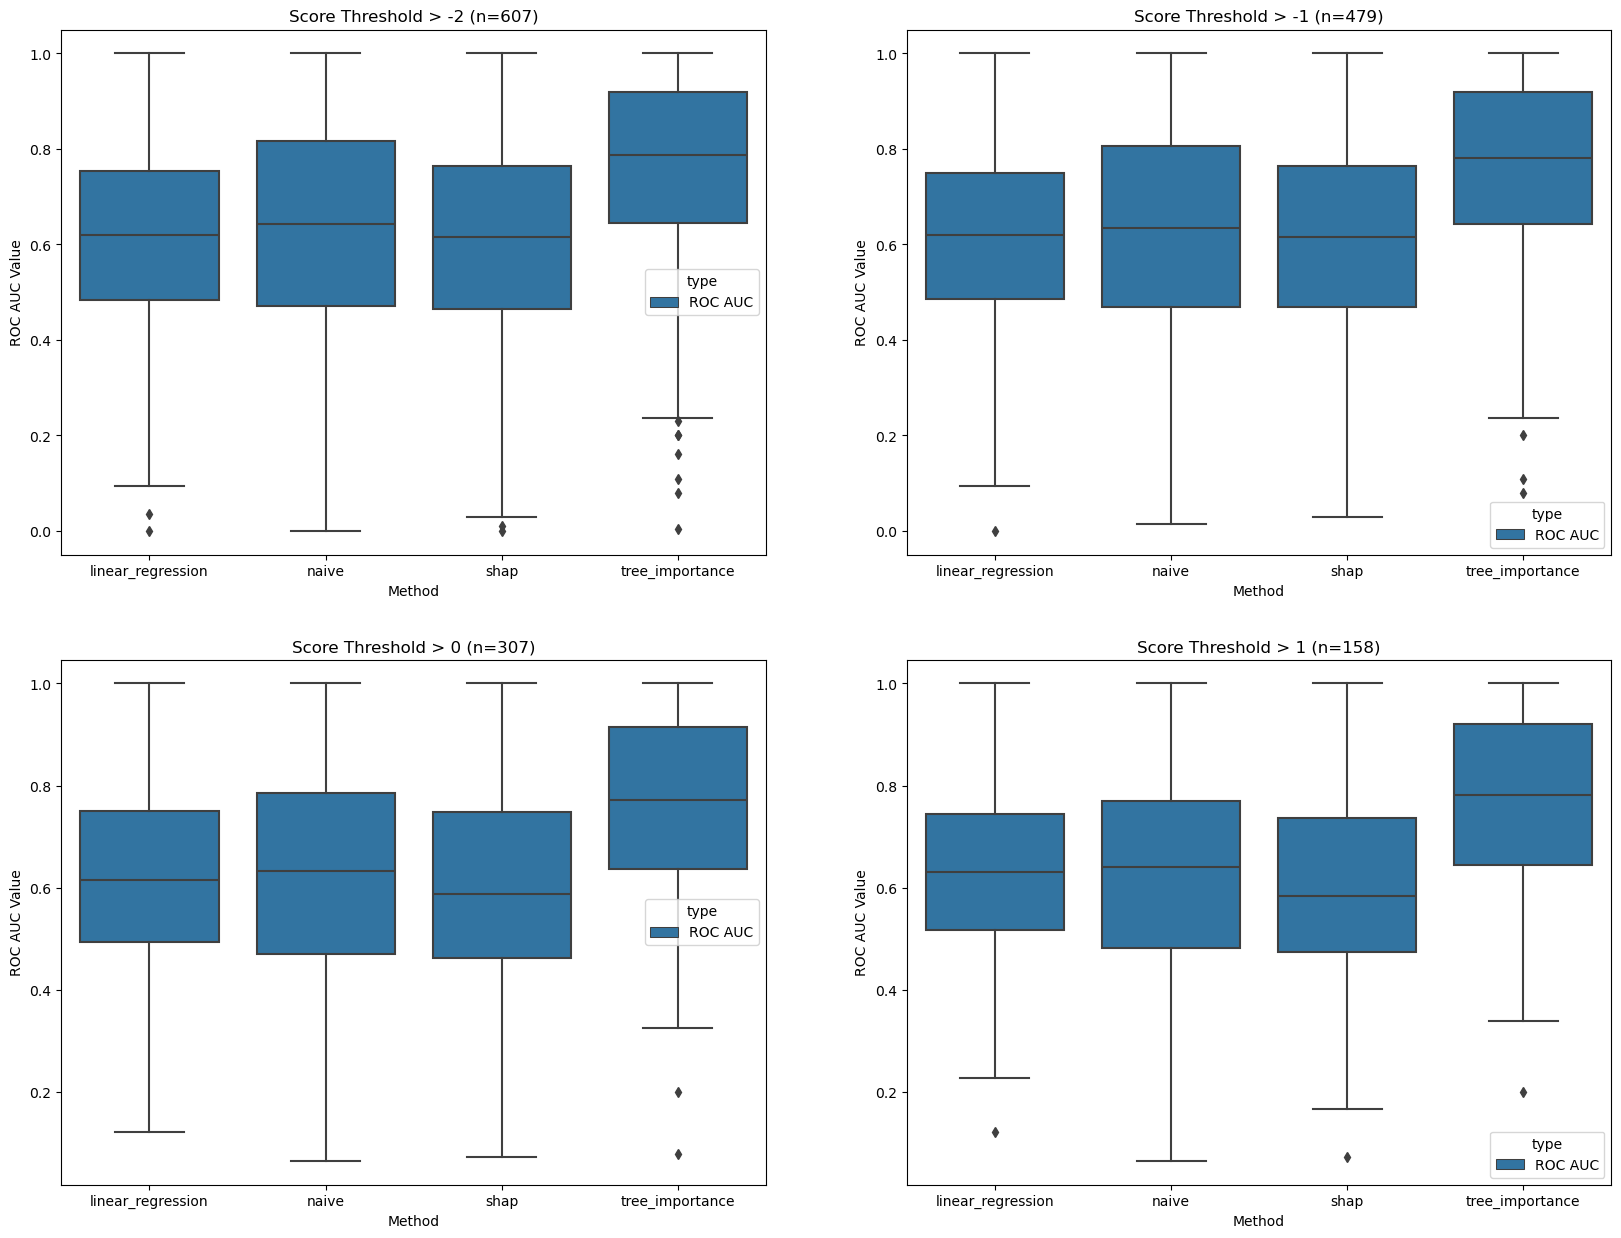

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

thresholds = [-2, -1, 0, 1]
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
axs = axs.ravel()

for idx, threshold in enumerate(thresholds):
    dfs = []
    for file in files_auc:
        df = pd.read_csv(file, sep='\t')
        method = file.split('/')[-1].replace('order_', '').replace('.tsv', '')
        df = df[df['actual_score'] > threshold]
        
        ndcg_actual = pd.DataFrame({
            'method': method,
            'type': 'ROC AUC',
            'value': df['roc_auc']
        })

        dfs.extend([ndcg_actual])
    
    plot_df = pd.concat(dfs)
    
    sns.boxplot(data=plot_df, x='method', y='value', hue='type', ax=axs[idx])
    axs[idx].set_title(f'Score Threshold > {threshold} (n={len(df)})')
    axs[idx].set_xlabel('Method')
    axs[idx].set_ylabel('ROC AUC Value')

NDCG

In [ ]:
import pandas as pd


thresholds = [-2, -1, 0, 1]
results = []
for file in files_ndcg:
    df = pd.read_csv(file, sep='\t')
    method = file.split('/')[-1].replace('ndcg_', '').replace('.tsv', '')
    
    for threshold in thresholds:
        filtered_df = df[df['actual_score'] > threshold]
        
        result = {
            'method': method,
            'threshold': threshold,
            'mean_ndcg_k': filtered_df['ndcg_k'].mean(),
            'mean_ndcg_k_random': filtered_df['ndcg_k_random'].mean(),
            'ndcg_total': filtered_df['ndcg_total'].iloc[0],
            'ndcg_total_random': filtered_df['ndcg_total_random'].iloc[0],
            'count': len(filtered_df)
        }
        results.append(result)

final_df = pd.DataFrame(results)
print(final_df)

               method  threshold  mean_ndcg_k  mean_ndcg_k_random  ndcg_total  \
0   linear_regression         -2     0.181486            0.189716    0.281464   
1   linear_regression         -1     0.176787            0.196805    0.281464   
2   linear_regression          0     0.158282            0.204245    0.281464   
3   linear_regression          1     0.129080            0.206747    0.327767   
4               naive         -2     0.431489            0.187028    0.338282   
5               naive         -1     0.442279            0.192916    0.338282   
6               naive          0     0.439779            0.201666    0.338282   
7               naive          1     0.441614            0.197350    0.898879   
8                shap         -2     0.456327            0.186305    0.237558   
9                shap         -1     0.469183            0.193732    0.237558   
10               shap          0     0.468231            0.198034    0.237558   
11               shap       

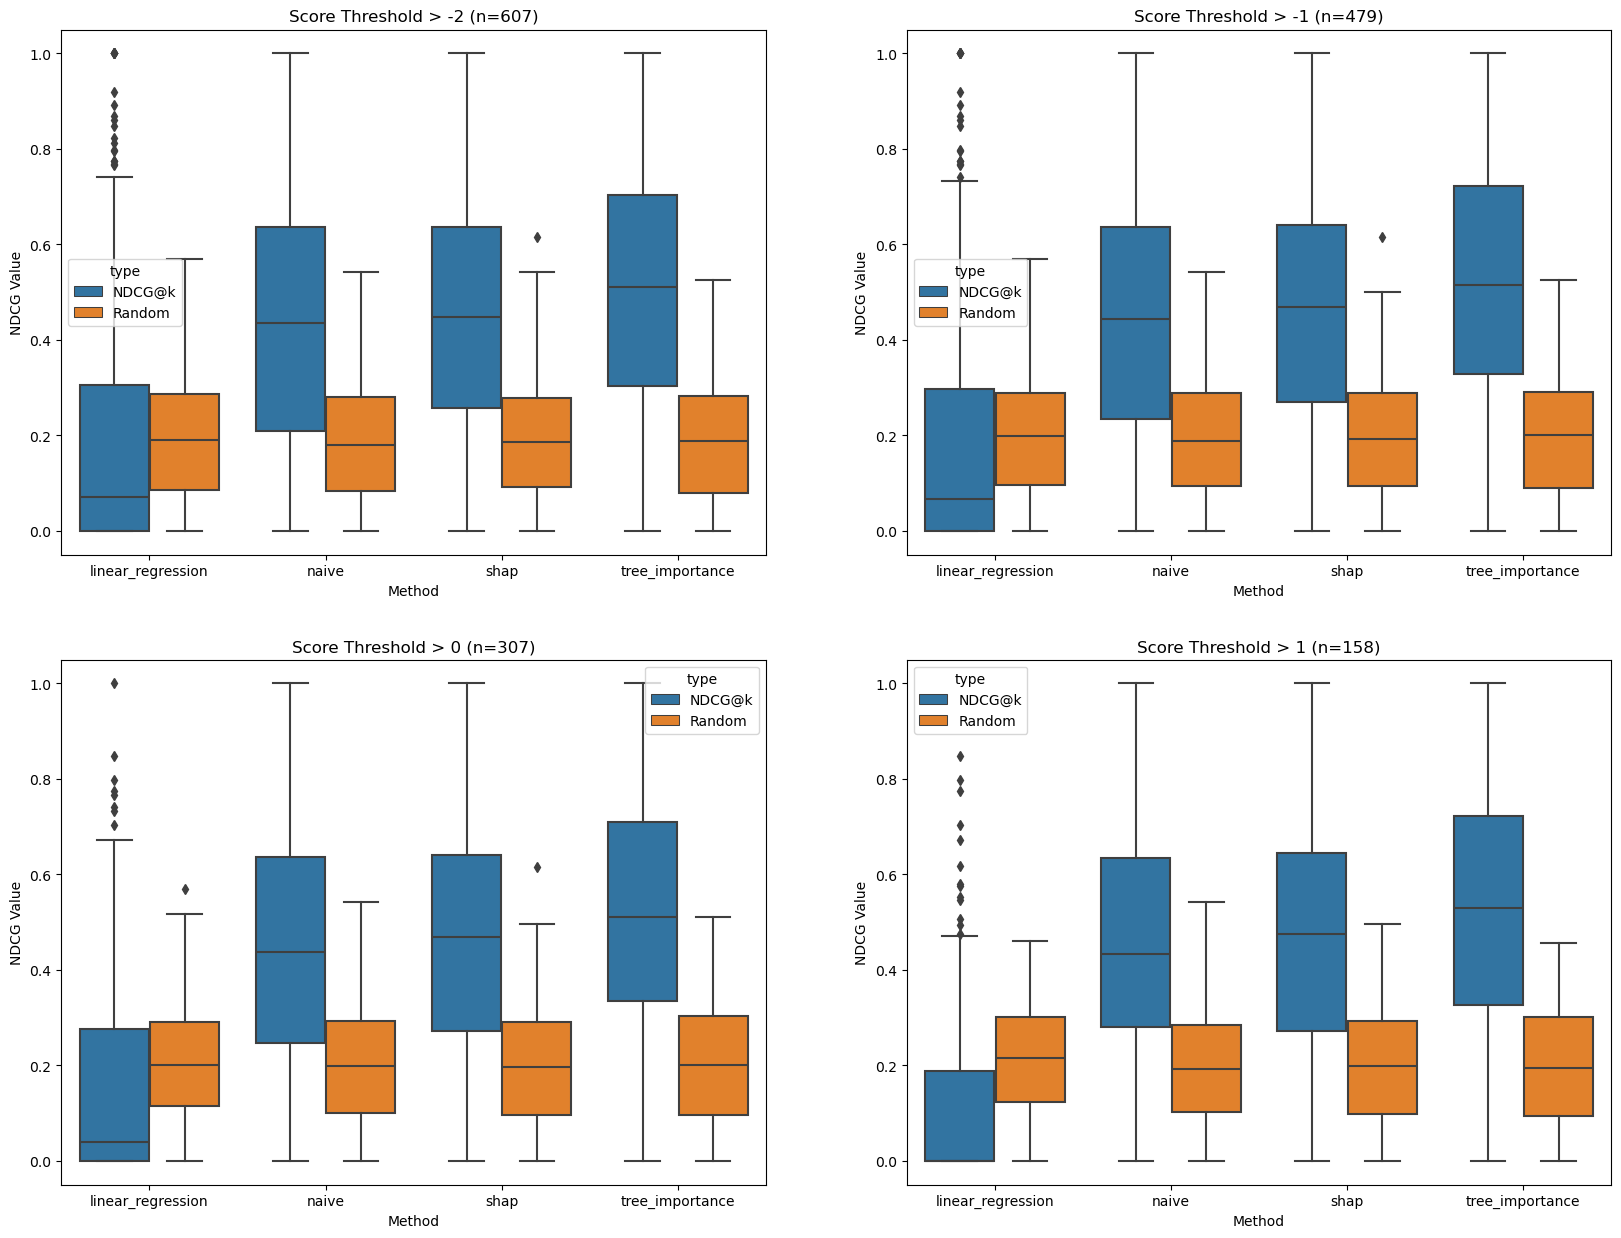

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

thresholds = [-2, -1, 0, 1]
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
axs = axs.ravel()

for idx, threshold in enumerate(thresholds):
    dfs = []
    for file in files_ndcg:
        df = pd.read_csv(file, sep='\t')
        method = file.split('/')[-1].replace('ndcg_', '').replace('.tsv', '')
        df = df[df['actual_score'] > threshold]
        
        ndcg_actual = pd.DataFrame({
            'method': method,
            'type': 'NDCG@k',
            'value': df['ndcg_k']
        })
        ndcg_random = pd.DataFrame({
            'method': method,
            'type': 'Random',
            'value': df['ndcg_k_random']
        })
        dfs.extend([ndcg_actual, ndcg_random])
    
    plot_df = pd.concat(dfs)
    
    sns.boxplot(data=plot_df, x='method', y='value', hue='type', ax=axs[idx])
    axs[idx].set_title(f'Score Threshold > {threshold} (n={len(df)})')
    axs[idx].set_xlabel('Method')
    axs[idx].set_ylabel('NDCG Value')

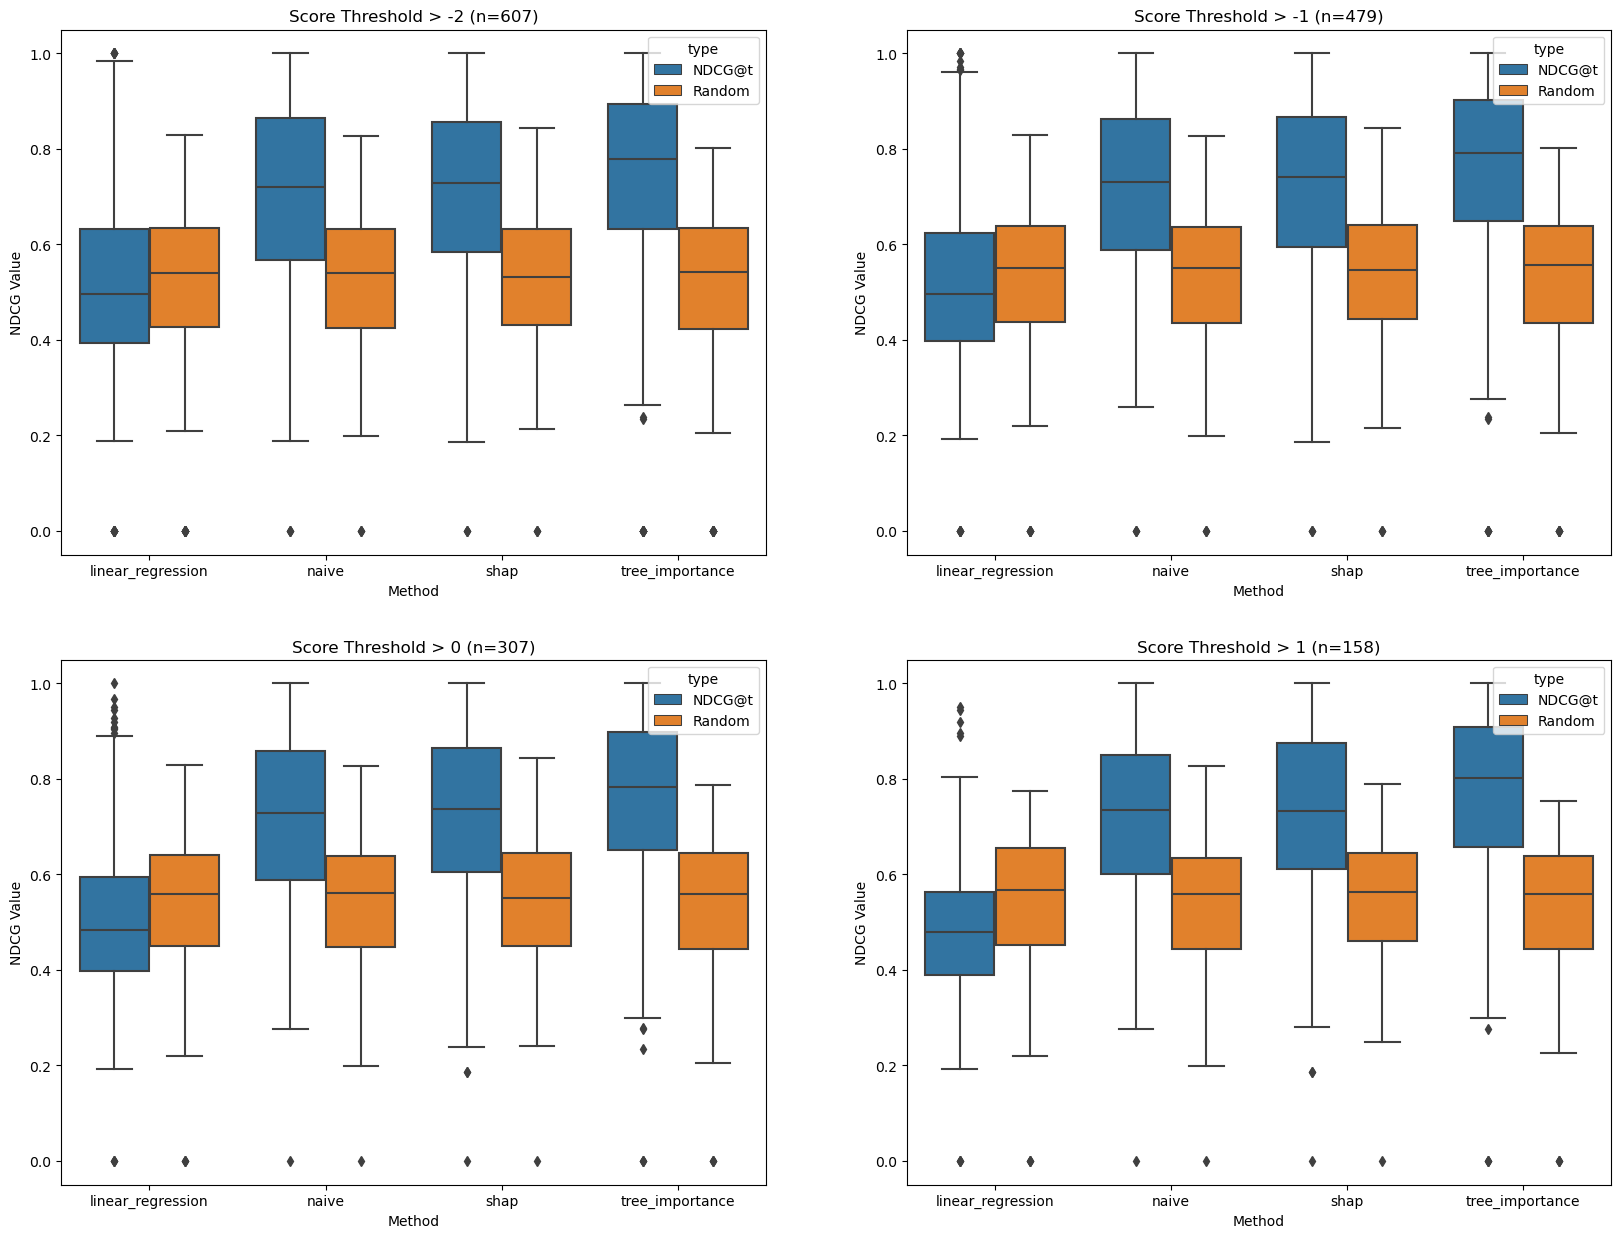

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

thresholds = [-2, -1, 0, 1]
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
axs = axs.ravel()

for idx, threshold in enumerate(thresholds):
    dfs = []
    for file in files_ndcg:
        df = pd.read_csv(file, sep='\t')
        method = file.split('/')[-1].replace('ndcg_', '').replace('.tsv', '')
        df = df[df['actual_score'] > threshold]
        
        ndcg_actual = pd.DataFrame({
            'method': method,
            'type': 'NDCG@t',
            'value': df['ndcg_total']
        })
        ndcg_random = pd.DataFrame({
            'method': method,
            'type': 'Random',
            'value': df['ndcg_total_random']
        })
        dfs.extend([ndcg_actual, ndcg_random])
    
    plot_df = pd.concat(dfs)
    
    sns.boxplot(data=plot_df, x='method', y='value', hue='type', ax=axs[idx])
    axs[idx].set_title(f'Score Threshold > {threshold} (n={len(df)})')
    axs[idx].set_xlabel('Method')
    axs[idx].set_ylabel('NDCG Value')


## Leo Metric

In [88]:
import numpy as np

def analyze_data(ndcg_files, curve_files):
    ndcg_data = {}
    k_values = {}
    for file in ndcg_files:
        df = pd.read_csv(file, sep='\t')
        method = file.split('/')[-1].replace('ndcg_', '').replace('.tsv', '')
        for _, row in df.iterrows():
            key = (method, row['filename'], row['event_label'])
            ndcg_data[key] = row['ndcg_k']
            k_values[key] = row['k']  # Store k value


    results = []
    for file in curve_files:
        df = pd.read_csv(file, sep='\t')
        method = file.split('/')[-1].replace('score_curve_', '').replace('.tsv', '')
        
        for _, row in df.iterrows():
            key = (method, row['filename'], row['event_label'])
            if key in ndcg_data:
                ascending = np.array(eval(row['score_curve_descending_higher'])) - row['actual_score']
                descending = np.array(eval(row['score_curve_descending_lower'])) - row['actual_score']
                ascending = np.concatenate(([0], ascending))
                descending = np.concatenate(([0], descending))                 
                x_plot = np.arange(0, len(ascending))
                k = k_values[key]

                exp_decay = np.where(x_plot <= k, 
                        -8 * (1 - np.exp(-x_plot/3)),  # Decay until k
                        -8 * (1 - np.exp(-k/3)))   # Constant after k
                n = len(ascending)
                sigmoid = -8 * (1 / (1 + np.exp(-(x_plot - (n-k))/2)))
                
                results.append({
                    'method': method,
                    'filename': row['filename'],
                    'event_label': row['event_label'],
                    'actual_score': row['actual_score'],
                    'ndcg_k': ndcg_data[key],
                    'k': k_values[key],
                    'corr_exp': np.corrcoef(ascending, exp_decay)[0,1],
                    'corr_sig': np.corrcoef(descending, sigmoid)[0,1],
                    'score_curve_descending_higher': row['score_curve_descending_higher'],
                    'score_curve_descending_lower': row['score_curve_descending_lower']
                })
    
    return pd.DataFrame(results)

df_correlations_ndcg = analyze_data(files_ndcg, files_curve)

/home/cbolanos/miniconda3/envs/tesis/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/cbolanos/miniconda3/envs/tesis/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/cbolanos/miniconda3/envs/tesis/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/cbolanos/miniconda3/envs/tesis/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/cbolanos/miniconda3/envs/tesis/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/cbolanos/miniconda3/envs/tesis/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value e

In [89]:
df_correlations_ndcg

,method,filename,event_label,actual_score,ndcg_k,k,corr_exp,corr_sig,score_curve_descending_higher,score_curve_descending_lower
0,linear_regression,k1aqrzHl3qI,Animal,0.386818,0.000000,2.0,0.065472,0.488828,"[0.9549369215965271, 1.223373293876648, 1.2084...","[0.4559780955314636, 0.553532600402832, 1.6040..."
1,linear_regression,k1aqrzHl3qI,Cat,1.801395,0.000000,5.0,0.292414,0.573595,"[2.2924489974975586, 2.517216205596924, 2.4587...","[1.6723942756652832, 1.7454197406768799, 2.160..."
2,linear_regression,HTV8wmQ_NQ4,Wood,-1.726863,0.433425,12.0,0.535175,0.914340,"[-3.138777256011963, -3.7927298545837402, -4.1...","[-0.34435325860977173, -0.24050161242485046, -..."
3,linear_regression,As1qH-6EF4I,Speech,0.074297,0.000000,2.0,0.143249,0.419094,"[0.16224530339241028, 0.23659712076187134, 0.2...","[0.24390089511871338, 0.2740434408187866, 0.49..."
4,linear_regression,As1qH-6EF4I,Sneeze,-1.768096,0.000000,4.0,0.222029,0.412847,"[-1.563157081604004, -1.94792640209198, -1.947...","[-1.6405203342437744, -1.8123621940612793, -1...."
...,...,...,...,...,...,...,...,...,...,...
2423,tree_importance,IPQmmACnIzY,Drip,-1.231511,0.000000,1.0,0.132963,0.846606,"[-1.4655402898788452, -1.618867039680481, -1.8...","[-1.3480473756790161, -1.315150260925293, -1.2..."
2424,tree_importance,IPQmmACnIzY,Water,-1.146729,0.646060,11.0,0.409275,0.288055,"[-1.270449161529541, -1.329245924949646, -1.37...","[-1.0742573738098145, -1.07962167263031, -1.08..."
2425,tree_importance,Zt-2s6YGPOE,Speech,-0.407834,1.000000,3.0,0.721006,0.017310,"[-0.3109618127346039, -0.2572687268257141, -0....","[-0.4120410084724426, -0.38666197657585144, -0..."
2426,tree_importance,Ym6-5IPOG5E,Speech,1.429125,0.480059,16.0,0.029787,0.529800,"[1.2652004957199097, 1.1564470529556274, 0.798...","[1.7719656229019165, 1.8486950397491455, 1.848..."


In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_single_row(df, row_index=0):
    row = df.iloc[row_index]
    
    ascending_scores = eval(row['score_curve_descending_higher']) - row['actual_score']
    descending_scores = eval(row['score_curve_descending_lower']) - row['actual_score']
    ascending_scores = np.concatenate(([0], ascending_scores))
    descending_scores = np.concatenate(([0], descending_scores))

    k = row['k']  # Store k value
    x_plot = np.arange(0, len(ascending_scores))
    exp_decay = np.where(x_plot <= k, 
                        -8 * (1 - np.exp(-x_plot/3)),  # Decay until k
                        -8 * (1 - np.exp(-k/3)))   # Constant after k
    n = len(ascending_scores)
    sigmoid = -8 * (1 / (1 + np.exp(-(x_plot - (n-k))/2)))
    
    # Calculate correlations
    # corr_blue_exp = np.corrcoef(ascending_scores, exp_decay)[0,1]
    # corr_red_sig = np.corrcoef(descending_scores, sigmoid)[0,1]
    corr_blue_exp = row['corr_exp']
    corr_red_sig = row['corr_sig']

    plt.figure(figsize=(12, 6))
    
    plt.plot(x_plot, ascending_scores, label=f'Score (higher to lower) [r={corr_blue_exp:.2f}]', color='blue', linewidth=2)
    plt.plot(x_plot, descending_scores, label=f'Score (lower to higher) [r={corr_red_sig:.2f}]', color='red', linewidth=2)
    plt.plot(x_plot, exp_decay, '--', label='Exponential decay', color='cyan', alpha=0.5)
    plt.plot(x_plot, sigmoid, '--', label='Sigmoid', color='orange', alpha=0.5)
    
    plt.title(f'Score Curve for {row["event_label"]}\nFile: {row["filename"]}\nNDCG@k={row["ndcg_k"]:.2f}\nMETHOD: {row["method"]}')
    plt.xlabel('Index')
    plt.ylabel('Score')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

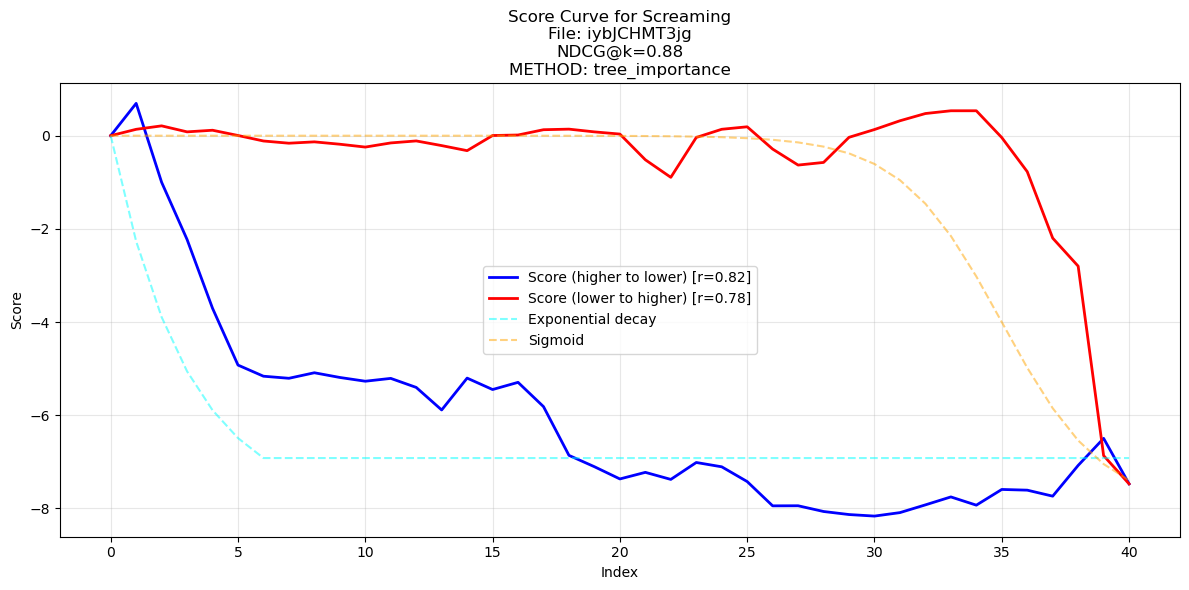

In [91]:
specific_row = df_correlations_ndcg[(df_correlations_ndcg['filename'] == 'iybJCHMT3jg') & 
                  (df_correlations_ndcg['event_label'] == 'Screaming') & (df_correlations_ndcg['method']=='tree_importance')].iloc[0]
plot_single_row(df_correlations_ndcg, specific_row.name)

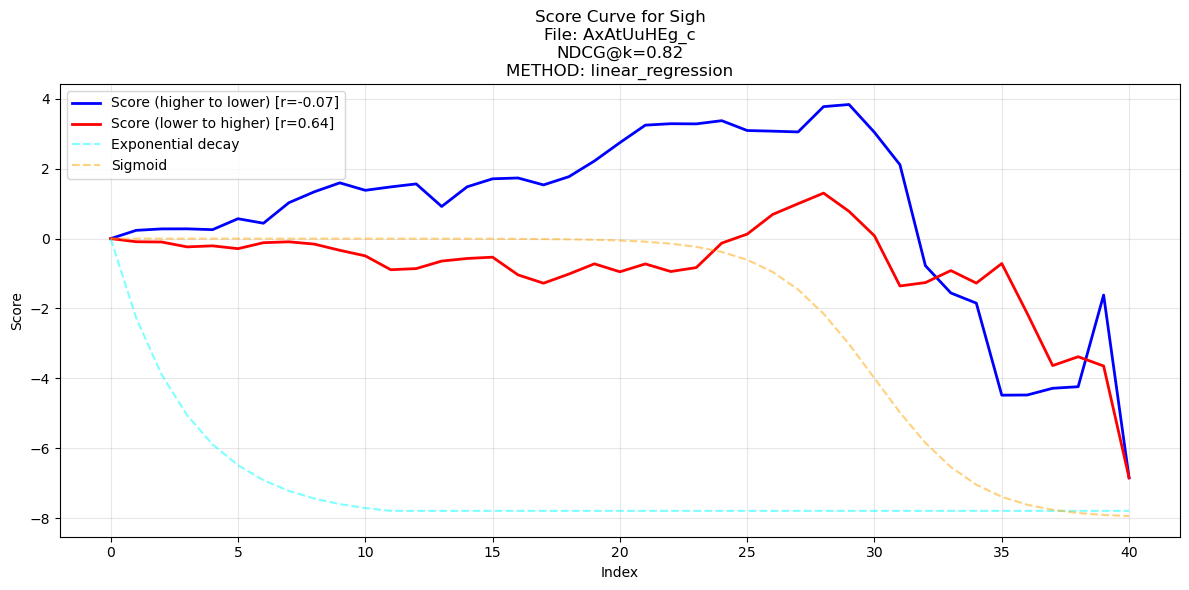

In [92]:
plot_single_row(df_correlations_ndcg, 9)

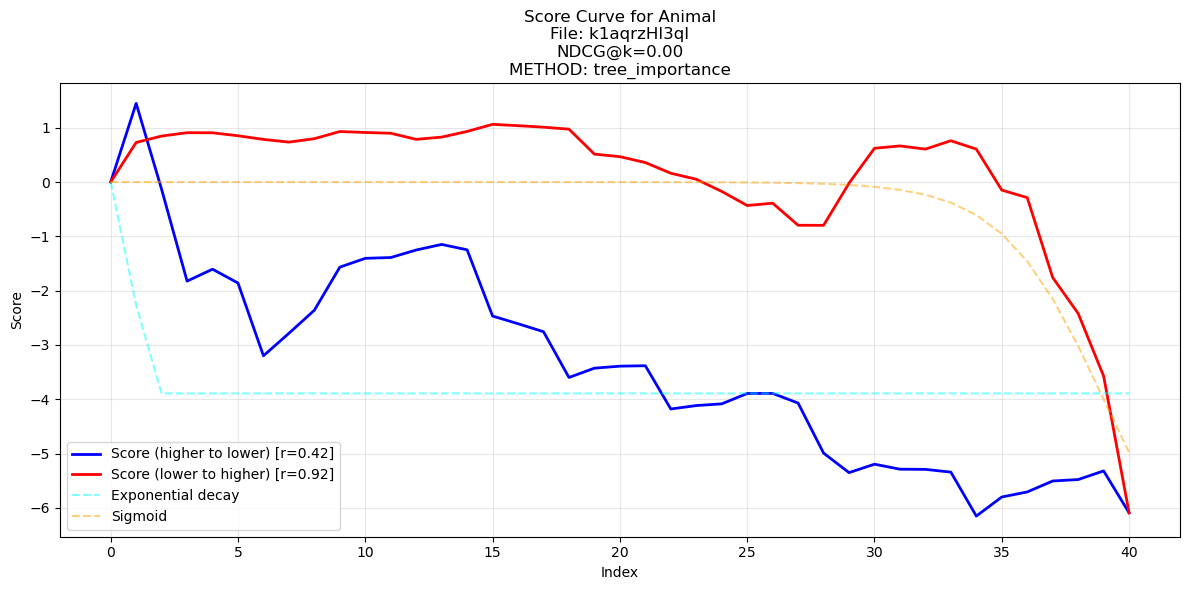

In [93]:
plot_single_row(df_correlations_ndcg, 1821)

In [83]:
df_correlations_ndcg[df_correlations_ndcg['method'] == 'tree_importance']

,method,filename,event_label,actual_score,ndcg_k,k,corr_exp,corr_sig,score_curve_descending_higher,score_curve_descending_lower
1821,tree_importance,k1aqrzHl3qI,Animal,0.386818,0.277485,2.0,0.421233,0.917196,"[1.8353424072265625, 0.25137776136398315, -1.4...","[1.1155439615249634, 1.2336217164993286, 1.295..."
1822,tree_importance,k1aqrzHl3qI,Cat,1.801395,0.963401,5.0,0.672394,0.966709,"[2.7601962089538574, 0.5750117301940918, -1.47...","[2.476125717163086, 2.527400493621826, 2.48535..."
1823,tree_importance,HTV8wmQ_NQ4,Wood,-1.726863,0.769689,12.0,0.415703,0.690612,"[-3.138777256011963, -1.7408090829849243, -2.4...","[-1.8414689302444458, -2.0393078327178955, -2...."
1824,tree_importance,As1qH-6EF4I,Speech,0.074297,0.571429,2.0,0.398524,0.923247,"[1.0531471967697144, 1.1451644897460938, 0.583...","[0.07429734617471695, 0.07429734617471695, 0.0..."
1825,tree_importance,As1qH-6EF4I,Sneeze,-1.768096,0.900547,4.0,0.830220,0.751771,"[-4.034051895141602, -7.87663459777832, -7.945...","[-1.7680952548980713, -1.7680952548980713, -1...."
...,...,...,...,...,...,...,...,...,...,...
2423,tree_importance,IPQmmACnIzY,Drip,-1.231511,0.262650,1.0,0.132963,0.846606,"[-1.4655402898788452, -1.618867039680481, -1.8...","[-1.3480473756790161, -1.315150260925293, -1.2..."
2424,tree_importance,IPQmmACnIzY,Water,-1.146729,0.839054,11.0,0.409275,0.288055,"[-1.270449161529541, -1.329245924949646, -1.37...","[-1.0742573738098145, -1.07962167263031, -1.08..."
2425,tree_importance,Zt-2s6YGPOE,Speech,-0.407834,1.000000,3.0,0.721006,0.017310,"[-0.3109618127346039, -0.2572687268257141, -0....","[-0.4120410084724426, -0.38666197657585144, -0..."
2426,tree_importance,Ym6-5IPOG5E,Speech,1.429125,0.716961,16.0,0.029787,0.529800,"[1.2652004957199097, 1.1564470529556274, 0.798...","[1.7719656229019165, 1.8486950397491455, 1.848..."


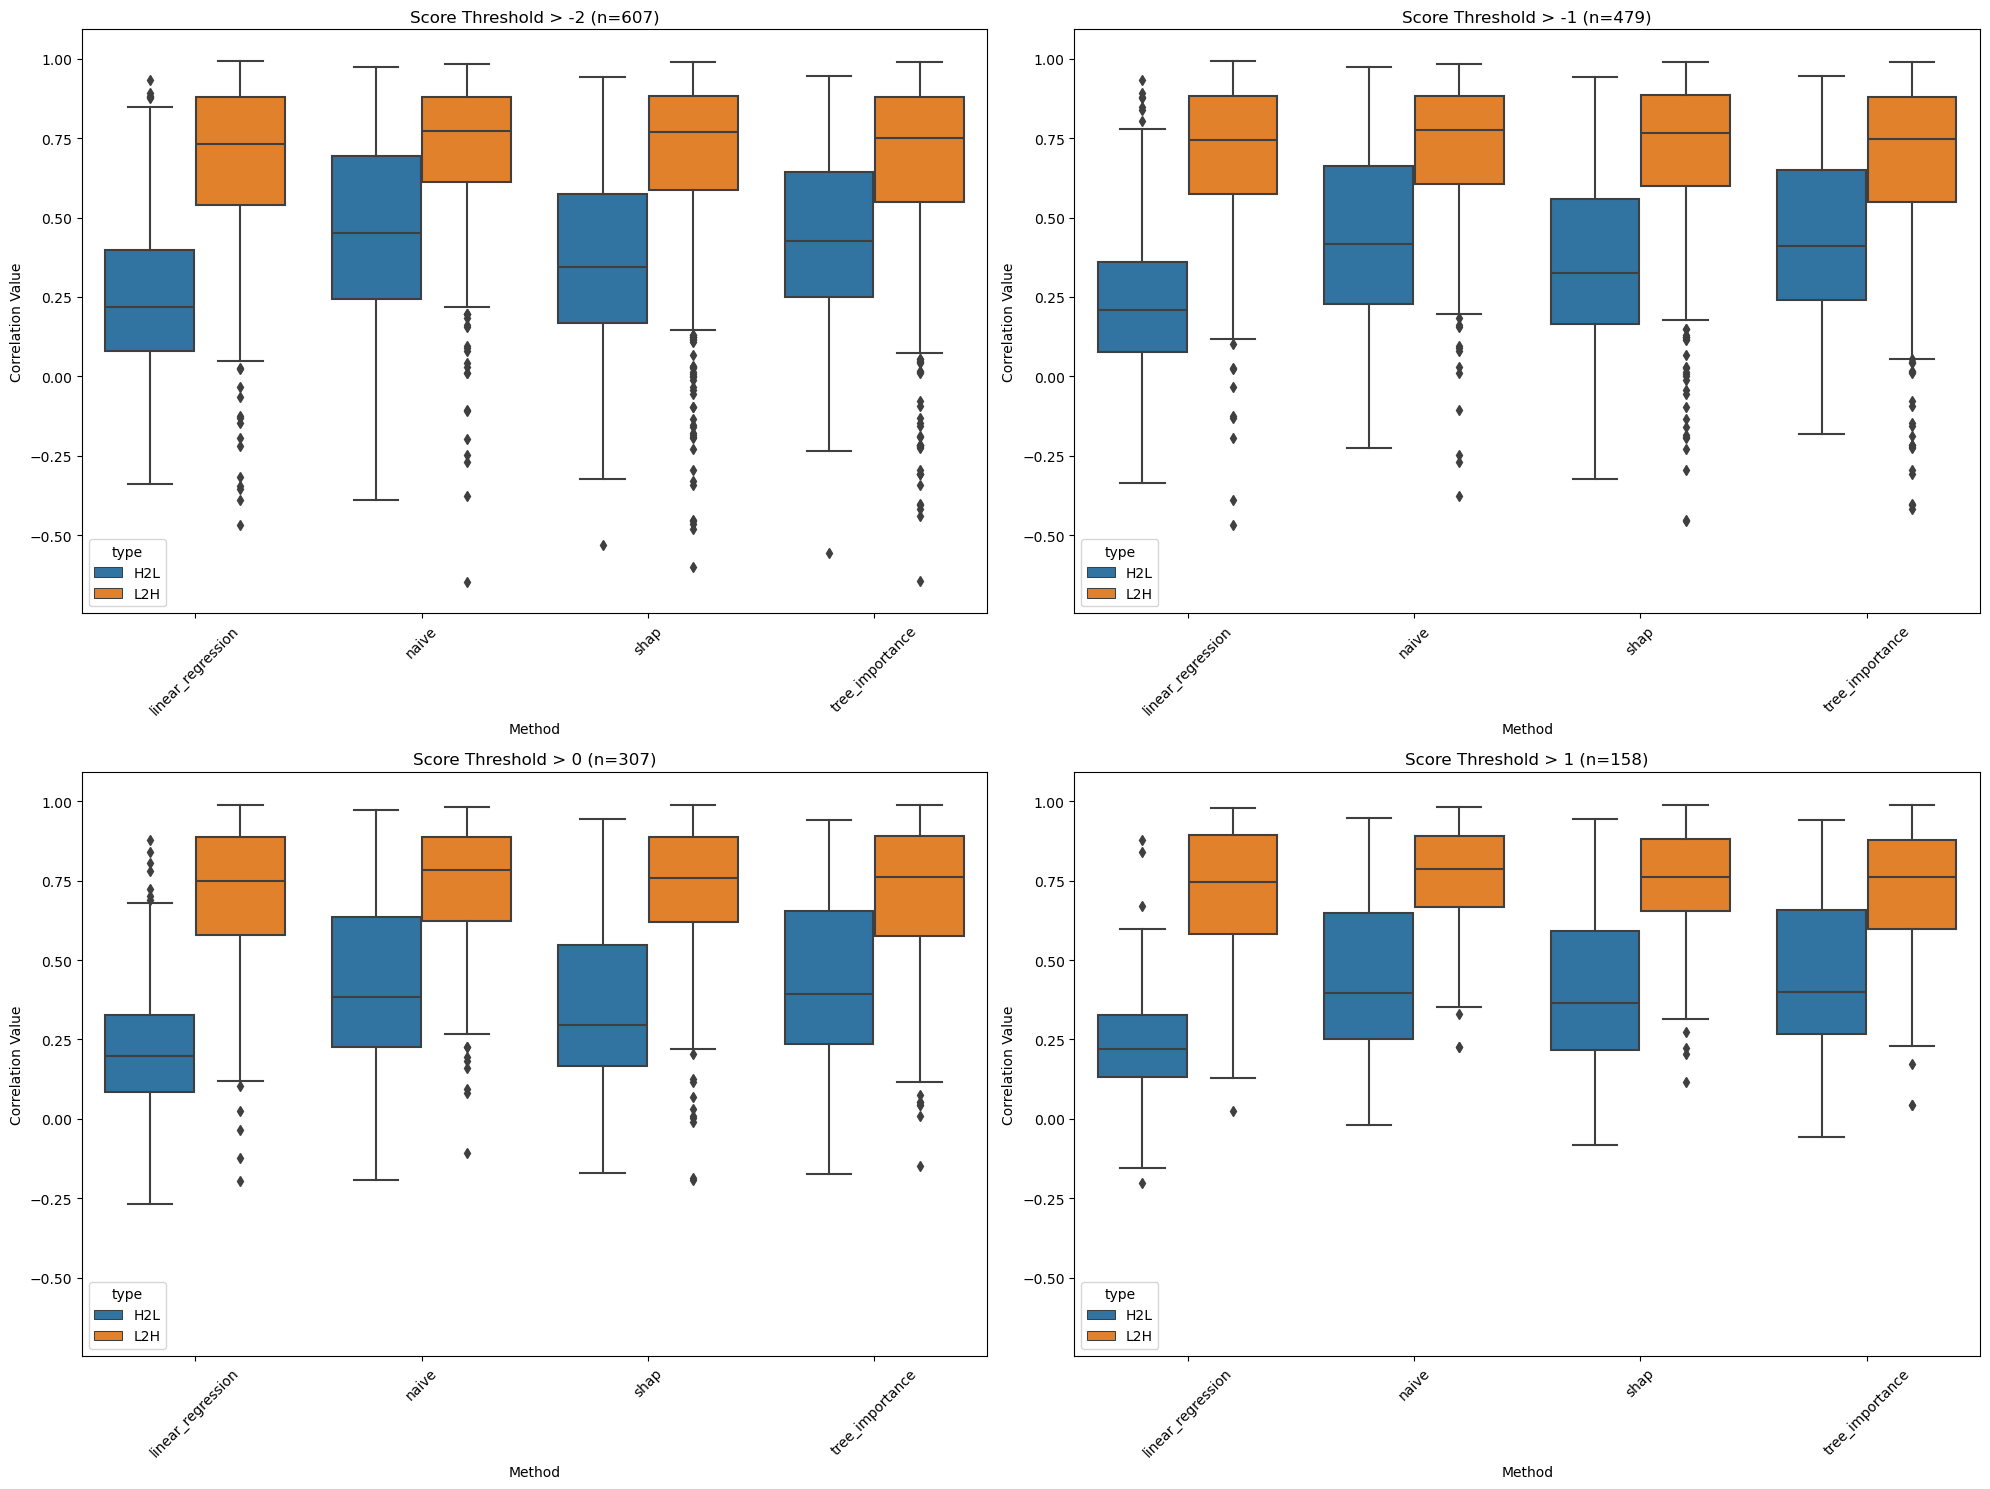

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

thresholds = [-2, -1, 0, 1]
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
axs = axs.ravel()

# First find the global min and max values across all thresholds
global_min = float('inf')
global_max = float('-inf')

for threshold in thresholds:
    df_threshold = df_correlations_ndcg[df_correlations_ndcg['actual_score'] > threshold]
    global_min = min(global_min, df_threshold['corr_exp'].min(), df_threshold['corr_sig'].min())
    global_max = max(global_max, df_threshold['corr_exp'].max(), df_threshold['corr_sig'].max())

# Add some padding to the limits
y_min = global_min - 0.1
y_max = global_max + 0.1

for idx, threshold in enumerate(thresholds):
    df_threshold = df_correlations_ndcg[df_correlations_ndcg['actual_score'] > threshold]
    
    dfs = []
    corr_exp_df = pd.DataFrame({
        'method': df_threshold['method'],
        'type': 'H2L',
        'value': df_threshold['corr_exp']
    })
    corr_sig_df = pd.DataFrame({
        'method': df_threshold['method'],
        'type': 'L2H',
        'value': df_threshold['corr_sig']
    })
    dfs.extend([corr_exp_df, corr_sig_df])
    
    plot_df = pd.concat(dfs)
    
    sns.boxplot(data=plot_df, x='method', y='value', hue='type', ax=axs[idx])
    axs[idx].set_title(f'Score Threshold > {threshold} (n={int(len(df_threshold)/4)})')
    axs[idx].set_xlabel('Method')
    axs[idx].set_ylabel('Correlation Value')
    axs[idx].tick_params(axis='x', rotation=45)
    
    # Set the same y-axis limits for all subplots
    axs[idx].set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

La pregunta es, NDCG correlaciona con haber tenido una buena correlacion en higher to lower? o en lower to higher? 


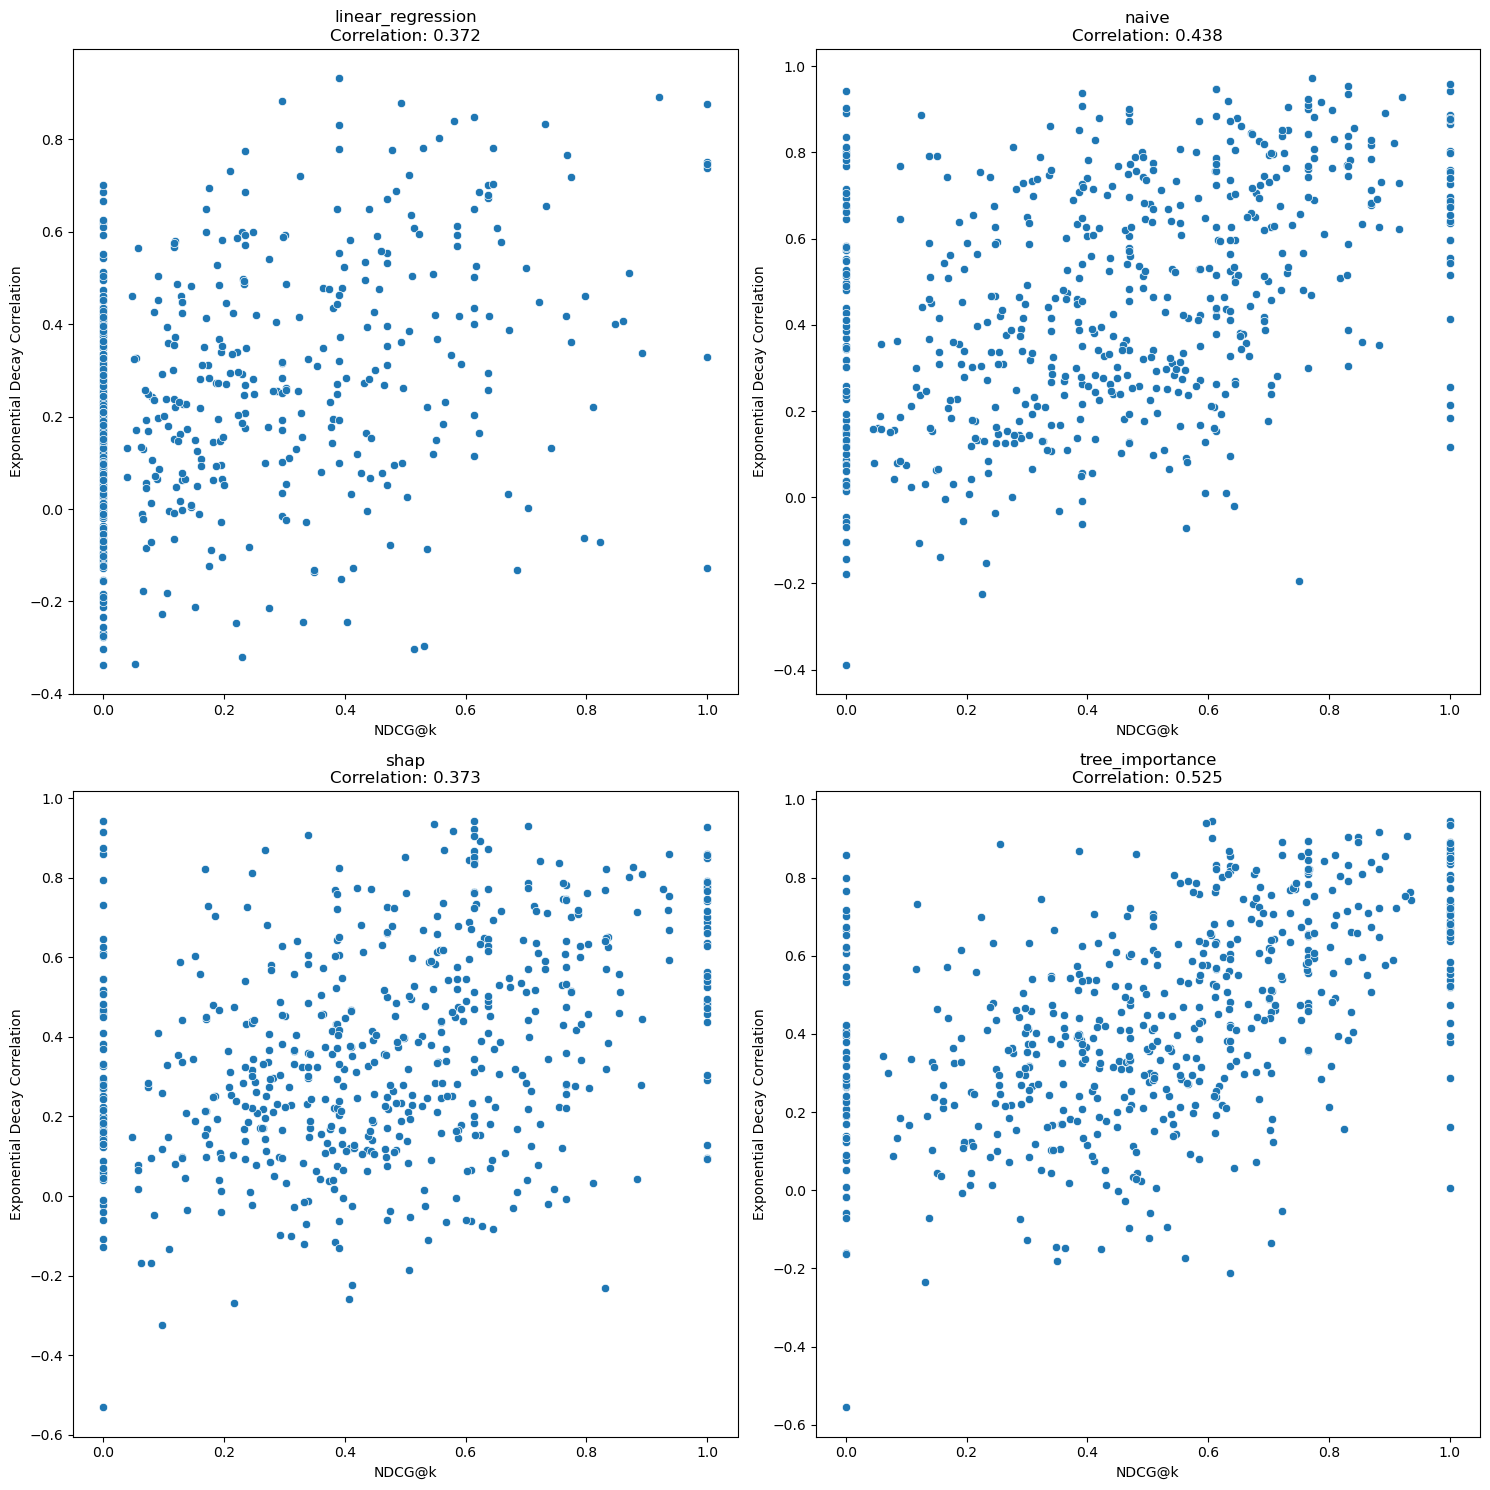

linear_regression: 0.372
naive: 0.438
shap: 0.373
tree_importance: 0.525


In [94]:
import seaborn as sns

methods = df_correlations_ndcg['method'].unique()
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.ravel()

for idx, method in enumerate(methods):
    method_df = df_correlations_ndcg[df_correlations_ndcg['method'] == method]
    
    # Calculate correlation
    correlation = method_df['ndcg_k'].corr(method_df['corr_exp'])
    
    # Scatter plot
    sns.scatterplot(data=method_df, x='ndcg_k', y='corr_exp', ax=axes[idx])
    axes[idx].set_title(f'{method}\nCorrelation: {correlation:.3f}')
    axes[idx].set_xlabel('NDCG@k')
    axes[idx].set_ylabel('Exponential Decay Correlation')


plt.tight_layout()
plt.show()

# Print correlations
for method in methods:
    correlation = df_correlations_ndcg[df_correlations_ndcg['method'] == method]['ndcg_k'].corr(df_correlations_ndcg[df_correlations_ndcg['method'] == method]['corr_exp'])
    print(f"{method}: {correlation:.3f}")

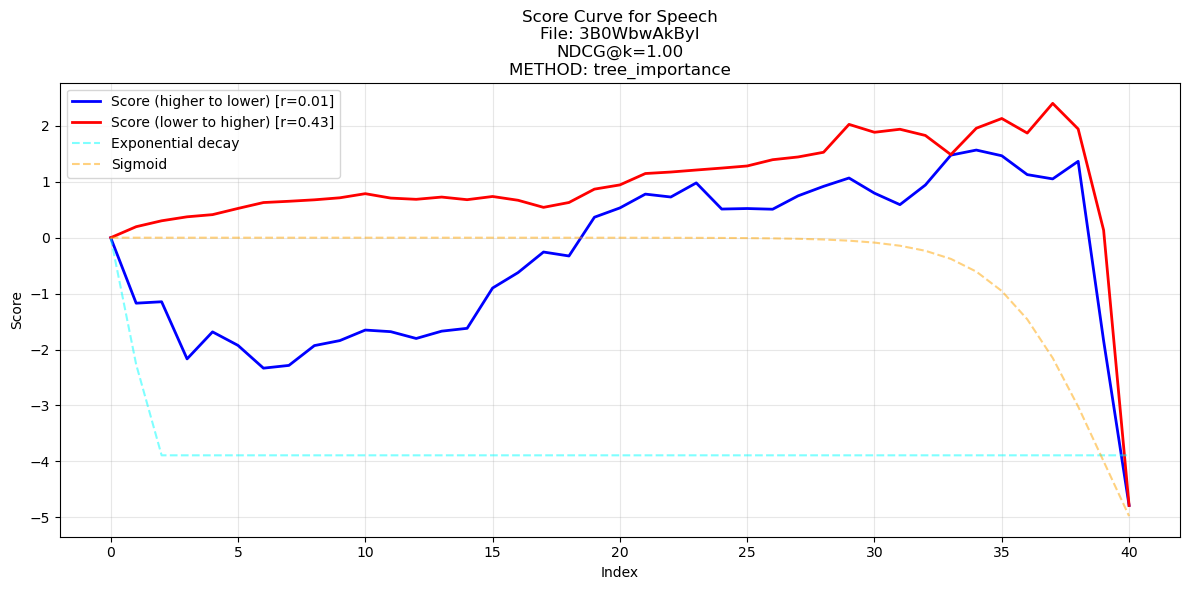

In [96]:
specific_row = df_correlations_ndcg[(df_correlations_ndcg['corr_exp'] < 0.1) & 
                  (df_correlations_ndcg['ndcg_k'] >0.9) & (df_correlations_ndcg['method'] == 'tree_importance')].iloc[0] 
plot_single_row(df_correlations_ndcg, specific_row.name)
